### Machine Learning 1

Our dataset is from Kaggle: "Heart Disease Dataset" by *Mazaharul Hasnine Mirza

Source: https://www.kaggle.com/datasets/mirzahasnine/heart-disease-dataset

We will start with our first part of Machine Learning in this notebook. We will be using the following Machine Learning models from `Scikit-learn`

**Classification**
- DecisionTreeClassifier
- RandomForestClassifier

**Preprocessing**
- OneHotEncoder

**Others**
- Resample
- GridSearchCV

More details on these ML models can be found at this link: https://scikit-learn.org/stable/


# Data Preparation

let's start by importing the essential python libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set

<function seaborn.rcmod.set(*args, **kwargs)>

## A Glance at the Cleaned Dataset

Let's import the file **heart_dis_cln.csv** which contains the cleaned data, prepared in our previous notebook.

In [2]:
heart_dis_cln = pd.read_csv('heart_dis_cln.csv')
heart_dis_cln

,Unnamed: 0,GENDER,AGE,AGEGROUP,EDUCATION,CURRENT_SMOKER,CIGS_PER_DAY,BP_MEDICATION,PREV_STROKE,PREV_HYPERTENSION,DIABETES,TOT_CHOLESTEROL,SYSTOLIC_BP,DIASTOLIC_BP,BMI,HEART_RATE,GLUCOSE_LEVEL,HEART_STROKE
0,0,Male,39,30-39,Postgraduate,False,0.0,False,False,False,False,195.0,106.0,70.0,26.97,80.0,77.0,False
1,1,Female,46,40-49,Primary School,False,0.0,False,False,False,False,250.0,121.0,81.0,28.73,95.0,76.0,False
2,2,Male,48,40-49,Uneducated,True,20.0,False,False,False,False,245.0,127.5,80.0,25.34,75.0,70.0,False
3,3,Female,61,60-69,Graduate,True,30.0,False,False,True,False,225.0,150.0,95.0,28.58,65.0,103.0,True
4,4,Female,46,40-49,Graduate,True,23.0,False,False,False,False,285.0,130.0,84.0,23.10,85.0,85.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3648,4232,Male,68,60-69,Uneducated,False,0.0,False,False,True,False,176.0,168.0,97.0,23.14,60.0,79.0,True
3649,4233,Male,50,50-59,Uneducated,True,1.0,False,False,True,False,313.0,179.0,92.0,25.97,66.0,86.0,True
3650,4234,Male,51,50-59,Graduate,True,43.0,False,False,False,False,207.0,126.5,80.0,19.71,65.0,68.0,False
3651,4235,Female,48,40-49,Primary School,True,20.0,NotDefined,False,False,False,248.0,131.0,72.0,22.00,84.0,86.0,False


Our dataset is from Kaggle: "Heart Disease Dataset" by *Mazaharul Hasnine Mirza

Source: https://www.kaggle.com/datasets/mirzahasnine/heart-disease-dataset

> **Gender**: gender of the patient   
> **Age**: age of the patient (years)  
> **education**: uneducated, primaryschool, graduate, postgraduate    
> **currentSmoker**: 0 (No), 1 (Yes)   
> **cigsPerDay**: Number of cigarettes per day = 0...70   
> **BPMeds**: Whether or not the person is taking blood pressure drugs = 0 (No), 1 (Yes)    
> **prevalentStroke**: Whether or not the person has had a stroke = 0 (No), 1 (Yes)   
> **prevalentHyp**: Blood pressure (BP) > = 140 mm Hg systolic and/or > = 90 diastolic = 0 (No), 1 (Yes)   
> **diabetes**: Whether or not the person has diabetes = 0 (No), 1 (Yes)   
> **TotChol**: total serum cholesterol (mm/dl)   
> **sysBP**: Systolic blood pressure = 84...220   
> **diaBP**: Diastolic blood pressure = 48...140   
> **BMI**: Body Mass Index = 16...57   
> **heartRate**: Heart rate = 44...143   
> **glucose**: Blood Sugar = 40...394   
> **Heart_stroke**: Whether or not the person has had a heart attack = 0 (No), 1 (Yes)   

In [3]:
print("Data type:\t", type(heart_dis_cln))
print("Data dims:\t", heart_dis_cln.shape)

Data type:	 <class 'pandas.core.frame.DataFrame'>
Data dims:	 (3653, 18)


In [4]:
heart_dis_cln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3653 non-null   int64  
 1   GENDER             3653 non-null   object 
 2   AGE                3653 non-null   int64  
 3   AGEGROUP           3653 non-null   object 
 4   EDUCATION          3653 non-null   object 
 5   CURRENT_SMOKER     3653 non-null   bool   
 6   CIGS_PER_DAY       3653 non-null   float64
 7   BP_MEDICATION      3653 non-null   object 
 8   PREV_STROKE        3653 non-null   bool   
 9   PREV_HYPERTENSION  3653 non-null   bool   
 10  DIABETES           3653 non-null   bool   
 11  TOT_CHOLESTEROL    3653 non-null   float64
 12  SYSTOLIC_BP        3653 non-null   float64
 13  DIASTOLIC_BP       3653 non-null   float64
 14  BMI                3653 non-null   float64
 15  HEART_RATE         3653 non-null   float64
 16  GLUCOSE_LEVEL      3653 

Unfortunately, the data type that we changed in the previous notebook has been reverted back when we reimported the clean data. Let's perform the same steps again to change the data type back to redduce memory usage in order to achieve shorter processing time.

In [5]:
def to_category(df, *args):
    for col_name in args:
        df[col_name] = df[col_name].astype("category")
    
def to_float32(df, *args):
    for col_name in args:
        df[col_name] = df[col_name].astype("float32")

def to_int32(df, *args):
    for col_name in args:
        df[col_name] = df[col_name].astype("int32")

In [6]:
to_category(heart_dis_cln, ["EDUCATION", "CURRENT_SMOKER", "BP_MEDICATION", "GENDER", "PREV_STROKE", "PREV_HYPERTENSION", "DIABETES", "HEART_STROKE", "AGEGROUP"])
to_float32(heart_dis_cln, ["CIGS_PER_DAY", "TOT_CHOLESTEROL", "SYSTOLIC_BP", "DIASTOLIC_BP", "BMI", "HEART_RATE", "GLUCOSE_LEVEL"])
to_int32(heart_dis_cln, "AGE")

In [7]:
heart_dis_cln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Unnamed: 0         3653 non-null   int64   
 1   GENDER             3653 non-null   category
 2   AGE                3653 non-null   int32   
 3   AGEGROUP           3653 non-null   category
 4   EDUCATION          3653 non-null   category
 5   CURRENT_SMOKER     3653 non-null   category
 6   CIGS_PER_DAY       3653 non-null   float32 
 7   BP_MEDICATION      3653 non-null   category
 8   PREV_STROKE        3653 non-null   category
 9   PREV_HYPERTENSION  3653 non-null   category
 10  DIABETES           3653 non-null   category
 11  TOT_CHOLESTEROL    3653 non-null   float32 
 12  SYSTOLIC_BP        3653 non-null   float32 
 13  DIASTOLIC_BP       3653 non-null   float32 
 14  BMI                3653 non-null   float32 
 15  HEART_RATE         3653 non-null   float32 
 16  GLUCOS

In [8]:
heart_dis_cln.isnull().sum()

Unnamed: 0           0
GENDER               0
AGE                  0
AGEGROUP             0
EDUCATION            0
CURRENT_SMOKER       0
CIGS_PER_DAY         0
BP_MEDICATION        0
PREV_STROKE          0
PREV_HYPERTENSION    0
DIABETES             0
TOT_CHOLESTEROL      0
SYSTOLIC_BP          0
DIASTOLIC_BP         0
BMI                  0
HEART_RATE           0
GLUCOSE_LEVEL        0
HEART_STROKE         0
dtype: int64

Now, our data is prepared to be used in our machine learning models!

We will be using our one response variable, `HEART_STROKE`, which is a categorical data. There are several ML models we will be using. For this notebook, we will be using `DecisionTreeClassifier` and `RandomForestClassifier`. We will then use the technique of **cross-validation** to improve the model. We will also be using `OneHotEncoder` and `resample` to facilitate our model building.

Before we start with **classification**, we would want to encode our categorical predictors so that we can fit them into our model for more effective prediction. We will be using `OneHotEncoder` to do this.

# OneHotEncoder (to encode categorical variables)

`OneHotEncoder` encodes categorical features as a one-hot numeric array. It will convert each category value into a new column and assign a 1 or 0 (notation for true/false) value to the column.

More details can be found at these links:
-  https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
-  https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd

We first need to import the essential libraries
> OneHotEncoder: Encode categorical features as a one-hot numeric array. 


We create a `OneHotEncoder` object and fit it using our data. Below shows the data types of the initial categorical variables after encoding.

In [9]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()

heart_dis_cln_cat = heart_dis_cln[["AGEGROUP", "GENDER", "EDUCATION", "CURRENT_SMOKER", "BP_MEDICATION", "PREV_STROKE", "PREV_HYPERTENSION", "DIABETES"]]
ohe.fit(heart_dis_cln_cat)

heart_dis_cln_cat_ohe=pd.DataFrame(ohe.transform(heart_dis_cln_cat).toarray(), 
                               columns=ohe.get_feature_names_out(heart_dis_cln_cat.columns))

heart_dis_cln_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AGEGROUP_30-39            3653 non-null   float64
 1   AGEGROUP_40-49            3653 non-null   float64
 2   AGEGROUP_50-59            3653 non-null   float64
 3   AGEGROUP_60-69            3653 non-null   float64
 4   AGEGROUP_70-79            3653 non-null   float64
 5   GENDER_Female             3653 non-null   float64
 6   GENDER_Male               3653 non-null   float64
 7   EDUCATION_Graduate        3653 non-null   float64
 8   EDUCATION_NotDefined      3653 non-null   float64
 9   EDUCATION_Postgraduate    3653 non-null   float64
 10  EDUCATION_Primary School  3653 non-null   float64
 11  EDUCATION_Uneducated      3653 non-null   float64
 12  CURRENT_SMOKER_False      3653 non-null   float64
 13  CURRENT_SMOKER_True       3653 non-null   float64
 14  BP_MEDIC

In [10]:
heart_dis_cln["HEART_STROKE"].unique()

[False, True]
Categories (2, object): [False, True]

The `OneHotEncoder` would require `HEART_STROKE` to be a numeric value to be added to the array. Thus, we will convert it to 0 for False and 1 for True so that it can be concatenated into the array.

In [11]:
heart_dis_cln["HEART_STROKE"] = heart_dis_cln["HEART_STROKE"].astype(int)

In [12]:
heart_dis_cln["HEART_STROKE"].unique()

array([0, 1])

In [13]:
heart_dis_cln_num=heart_dis_cln[["CIGS_PER_DAY", "TOT_CHOLESTEROL", "SYSTOLIC_BP", "DIASTOLIC_BP", "BMI", "HEART_RATE", "GLUCOSE_LEVEL"]]
heart_dis_cln_rspd=heart_dis_cln["HEART_STROKE"]

heart_dis_cln_ohe=pd.concat([heart_dis_cln_num, heart_dis_cln_cat_ohe, heart_dis_cln_rspd],
                       sort=False, axis=1).reindex(index=heart_dis_cln_num.index)

heart_dis_cln_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CIGS_PER_DAY              3653 non-null   float32
 1   TOT_CHOLESTEROL           3653 non-null   float32
 2   SYSTOLIC_BP               3653 non-null   float32
 3   DIASTOLIC_BP              3653 non-null   float32
 4   BMI                       3653 non-null   float32
 5   HEART_RATE                3653 non-null   float32
 6   GLUCOSE_LEVEL             3653 non-null   float32
 7   AGEGROUP_30-39            3653 non-null   float64
 8   AGEGROUP_40-49            3653 non-null   float64
 9   AGEGROUP_50-59            3653 non-null   float64
 10  AGEGROUP_60-69            3653 non-null   float64
 11  AGEGROUP_70-79            3653 non-null   float64
 12  GENDER_Female             3653 non-null   float64
 13  GENDER_Male               3653 non-null   float64
 14  EDUCATIO

In [14]:
heart_dis_cln_ohe

,CIGS_PER_DAY,TOT_CHOLESTEROL,SYSTOLIC_BP,DIASTOLIC_BP,BMI,HEART_RATE,GLUCOSE_LEVEL,AGEGROUP_30-39,AGEGROUP_40-49,AGEGROUP_50-59,...,BP_MEDICATION_False,BP_MEDICATION_NotDefined,BP_MEDICATION_True,PREV_STROKE_False,PREV_STROKE_True,PREV_HYPERTENSION_False,PREV_HYPERTENSION_True,DIABETES_False,DIABETES_True,HEART_STROKE
0,0.0,195.0,106.0,70.0,26.969999,80.0,77.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0
1,0.0,250.0,121.0,81.0,28.730000,95.0,76.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0
2,20.0,245.0,127.5,80.0,25.340000,75.0,70.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0
3,30.0,225.0,150.0,95.0,28.580000,65.0,103.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1
4,23.0,285.0,130.0,84.0,23.100000,85.0,85.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3648,0.0,176.0,168.0,97.0,23.139999,60.0,79.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1
3649,1.0,313.0,179.0,92.0,25.969999,66.0,86.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1
3650,43.0,207.0,126.5,80.0,19.709999,65.0,68.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0
3651,20.0,248.0,131.0,72.0,22.000000,84.0,86.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0


In [15]:
heart_dis_cln_cat_ohe.to_csv('heart_dis_cln_cat_ohe.csv', index=False)

## DecisionTreeClassifier (initial data)

Decision Tree is a Supervised Machine Learning Algorithm that uses a set of rules to make decisions. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

More details can be found at:
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://towardsdatascience.com/decision-tree-classifier-explained-in-real-life-picking-a-vacation-destination-6226b2b60575

We are going to use all the predictors we have to predict the level of occurrence of `HEART_STROKE`

Import the essential libraries.

> train_test_split: Split arrays or matrices into random train and test subsets.\
> DecisionTreeClassifier: A decision tree classifier.\
> plot_tree: Plot a decision tree.\
> confusion_matrix: Compute confusion matrix to evaluate the accuracy of a classification.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix

In [17]:
y = pd.DataFrame(heart_dis_cln_ohe["HEART_STROKE"])
X = pd.DataFrame(heart_dis_cln_ohe.drop("HEART_STROKE", axis = 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) #split the data into train:test=8:2

In [18]:
dectree=DecisionTreeClassifier(max_depth=4)
dectree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

[Text(0.5, 0.9, 'SYSTOLIC_BP <= 137.25\ngini = 0.229\nsamples = 2922\nvalue = [2537, 385]\nclass = 0'),
 Text(0.25, 0.7, 'AGEGROUP_50-59 <= 0.5\ngini = 0.178\nsamples = 2093\nvalue = [1886, 207]\nclass = 0'),
 Text(0.125, 0.5, 'AGEGROUP_60-69 <= 0.5\ngini = 0.149\nsamples = 1540\nvalue = [1415, 125]\nclass = 0'),
 Text(0.0625, 0.3, 'BMI <= 16.73\ngini = 0.124\nsamples = 1336\nvalue = [1247, 89]\nclass = 0'),
 Text(0.03125, 0.1, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = 1'),
 Text(0.09375, 0.1, 'gini = 0.122\nsamples = 1333\nvalue = [1246, 87]\nclass = 0'),
 Text(0.1875, 0.3, 'BMI <= 26.845\ngini = 0.291\nsamples = 204\nvalue = [168, 36]\nclass = 0'),
 Text(0.15625, 0.1, 'gini = 0.356\nsamples = 147\nvalue = [113, 34]\nclass = 0'),
 Text(0.21875, 0.1, 'gini = 0.068\nsamples = 57\nvalue = [55, 2]\nclass = 0'),
 Text(0.375, 0.5, 'BMI <= 26.205\ngini = 0.253\nsamples = 553\nvalue = [471, 82]\nclass = 0'),
 Text(0.3125, 0.3, 'DIASTOLIC_BP <= 56.0\ngini = 0.203\nsamples = 341\nvalu

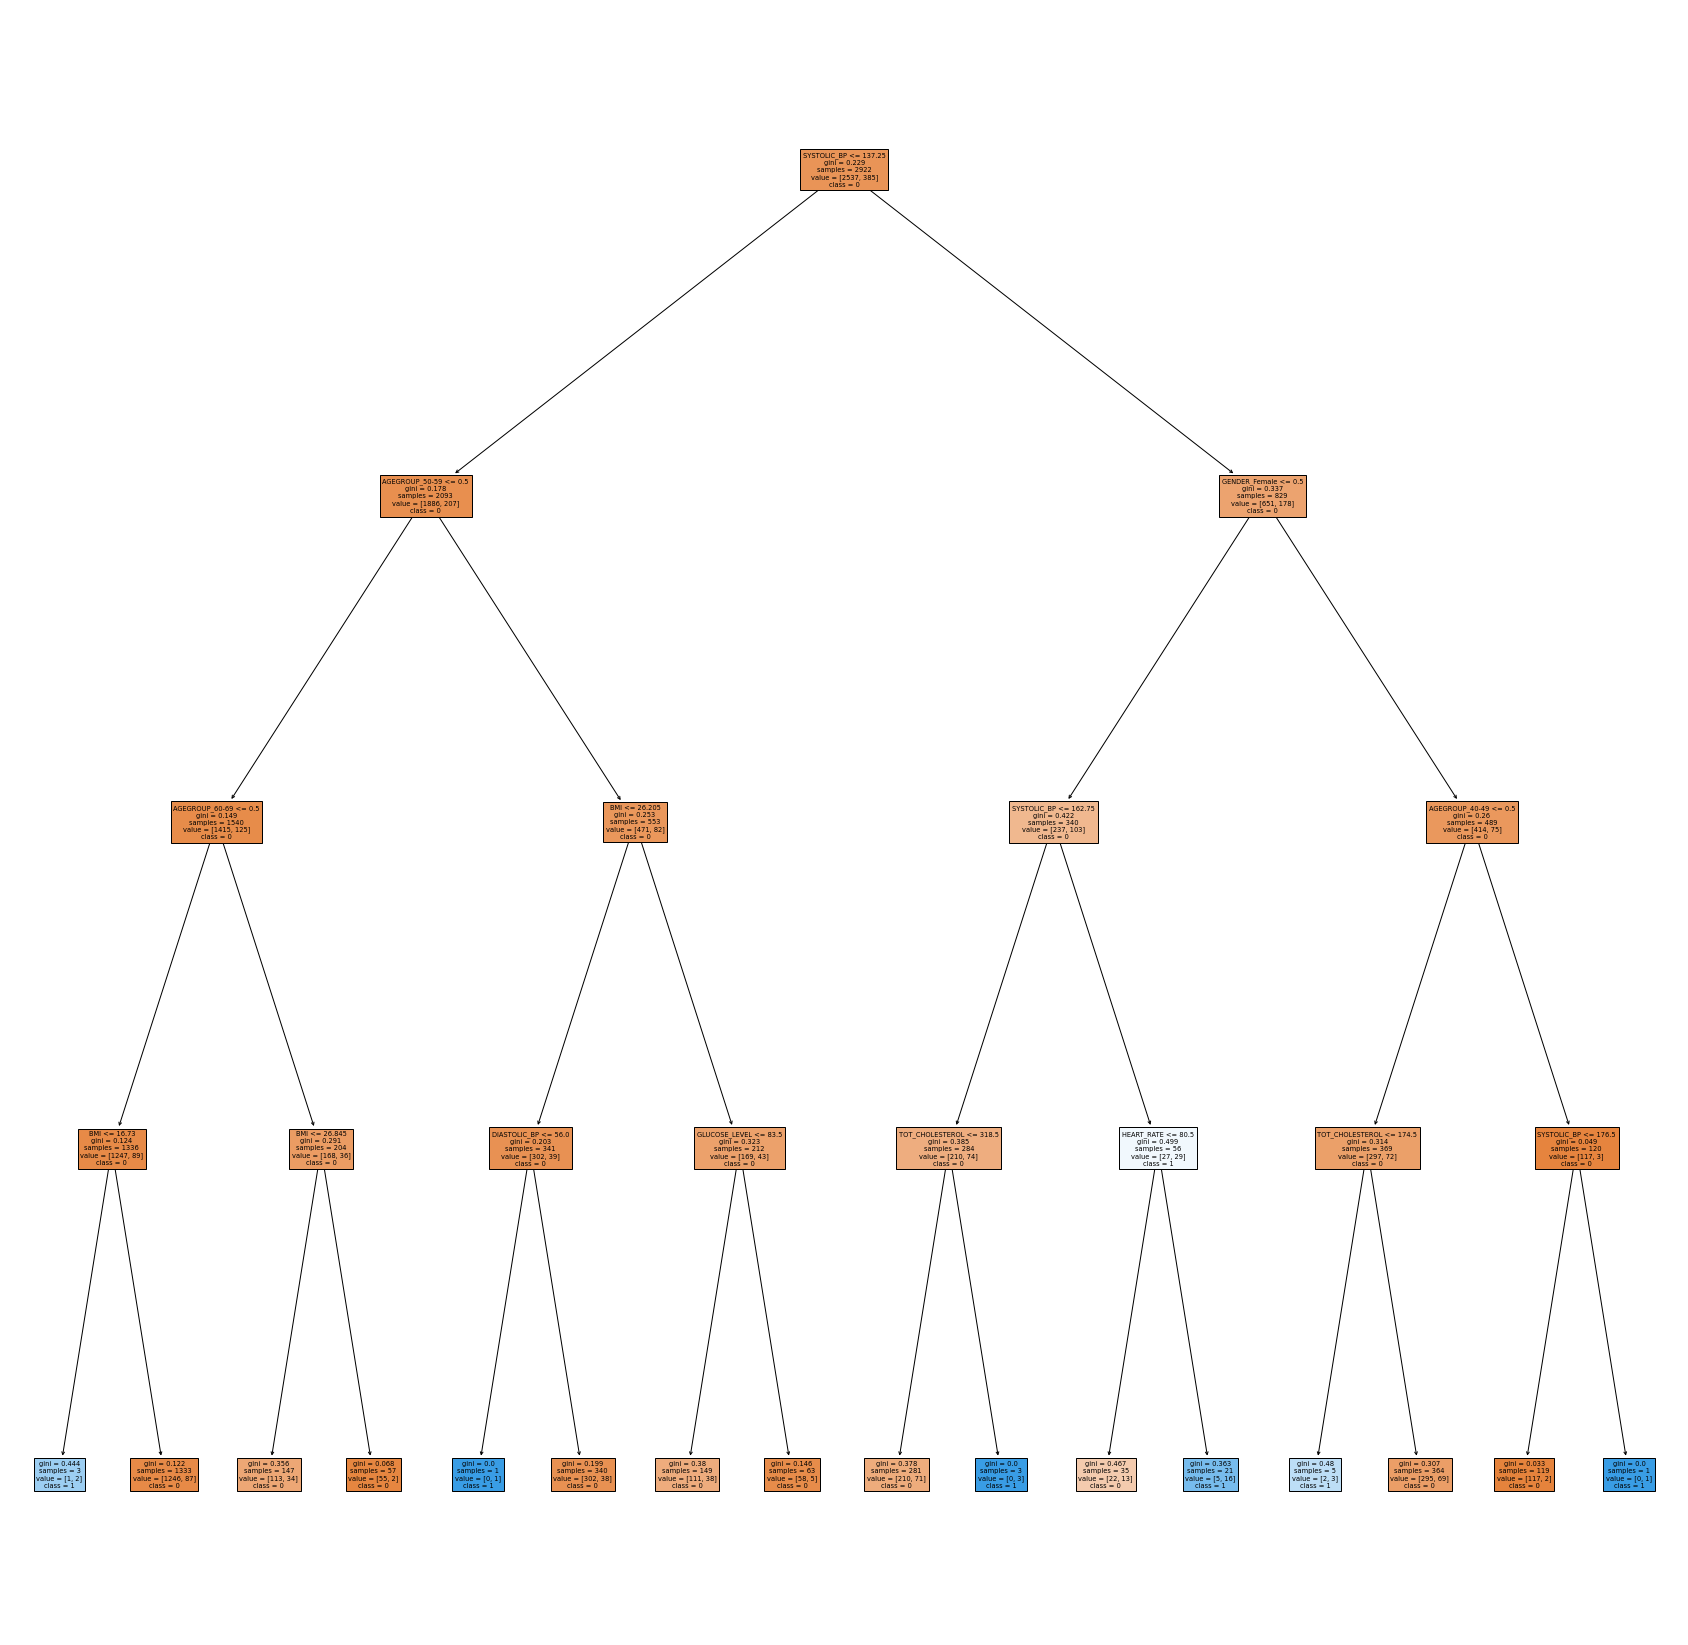

In [19]:
f=plt.figure(figsize=(30,30))
plot_tree(dectree, filled=True, feature_names=X_train.columns, class_names=["0", "1"])

We will now predict the **train** data using the model we trained just now and plot the **heatmap of confusion matrix**.

| Confusion Matrix  |       |        |     
| :---              | :---: | :----: |        
| Actual 0  |  TN  |  FP |            
| Actual 1  |  FN |  TP  |    
|                   | Predicted 0| Predicted 1|

<AxesSubplot:>

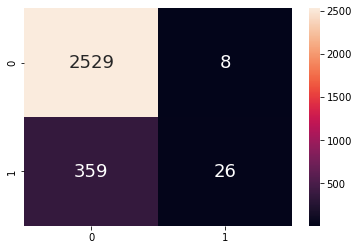

In [20]:
y_train_pred = dectree.predict(X_train)

sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [21]:
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

cmTrain = confusion_matrix(y_train, y_train_pred)
TN = cmTrain[0][0]
TP = cmTrain[1][1]

FP = cmTrain[0][1]
FN = cmTrain[1][0]


print("TN rate Train :\t", (TN/(TN + FP)))
print("FN rate Train :\t", (FN/(FN + TP)))
print()

print("TP rate Train :\t", (TP/(TP + FN)))
print("FP rate Train :\t", (FP/(FP + TN)))
print()



Train Data
Accuracy  :	 0.8744010951403148

TN rate Train :	 0.9968466692944422
FN rate Train :	 0.9324675324675324

TP rate Train :	 0.06753246753246753
FP rate Train :	 0.0031533307055577452



We will now predict the **test** data using the model we trained just now and plot the **heatmap of confusion matrix**.

| Confusion Matrix  |       |        |     
| :---              | :---: | :----: |        
| Actual 0  |  TN  |  FP |            
| Actual 1  |  FN |  TP  |    
|                   | Predicted 0| Predicted 1|

<AxesSubplot:>

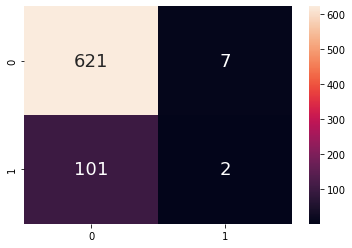

In [22]:
y_test_pred = dectree.predict(X_test)

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [23]:
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

cmTest = confusion_matrix(y_test, y_test_pred)
TN = cmTest[0][0]
TP = cmTest[1][1]

FP = cmTest[0][1]
FN = cmTest[1][0]


print("TN rate Test :\t", (TN/(TN + FP)))
print("FN rate Test :\t", (FN/(FN + TP)))
print()

print("TP rate Test :\t", (TP/(TP + FN)))
print("FP rate Test :\t", (FP/(FP + TN)))
print()

Test Data
Accuracy  :	 0.8522571819425444

TN rate Test :	 0.9888535031847133
FN rate Test :	 0.9805825242718447

TP rate Test :	 0.019417475728155338
FP rate Test :	 0.011146496815286623



For both the train and test data, there seems to be extremely high TN and FN rates, and conversely, extremely low TP and FP rates, with Negative referring to when `HEART_STROKE` does not occur(0) and Positive referring to when `HEART_STROKE` does occur(1).

This is most likely due to the fact that our classes of data are highly imbalanced as the number of patients with heart stroke is much lower than those without in the dataset. We will explore using resampling to counter this problem.

One thing to note is although the accuracy being around 0.85, we should not be too satisfied with the current model because it is biased towards class the non-occurrence of `HEART_STROKE`(0), due to it being much bigger in size.

## Resample

A classification data set with skewed class proportions is called **imbalanced**. Classes that make up a large proportion of the data set are called **majority classes**. Those that make up a smaller proportion are **minority classes**.

What counts as imbalanced? The answer could range from mild to extreme, as the table below shows.

| Degree of Imbalance | Proportion of Minority Class |
| :------------------ | ----------------------------:|
| Mild                | 20-40% of the data set       |
| Moderate            | 1-20% of the data set        |
| Extreme             | <1% of the data set          |

More details at: https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data

In [24]:
heart_dis_cln_ohe["HEART_STROKE"].value_counts()

0    3165
1     488
Name: HEART_STROKE, dtype: int64

The minority class takes up roughly **13.4%** of the data set. This means that the minority class of the occurrence of `HEART_STROKE` (1) falls in the moderate category, making the data rather imbalanced...

### Resample - Upsampling

The model resamples arrays or sparse matrices in a consistent way. Here, we use it to upsample our size of ```HEART_STROKE```  . We are going to increase the size of the class of the occurrence of `HEART_STROKE` (1) to the non-occurrence of `HEART_STROKE` (0). By applying this step, we solve the issue of the biased data. However, it might affect our prediction accuracy. We will then solve this issue in later parts.\
More details at: https://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html


Import the essential library.

> resample: Resample arrays or sparse matrices in a consistent way.

In [25]:
from sklearn.utils import resample

We then separate the data into the occurrence and non-occurrence of `HEART_STROKE` . We then resample them to the size of the class of the occurrence of  ```HEART_STROKE``` . (0)

In [26]:
absent = heart_dis_cln_ohe[heart_dis_cln_ohe.HEART_STROKE == 0]
present = heart_dis_cln_ohe[heart_dis_cln_ohe.HEART_STROKE == 1]

In [27]:
present_up = resample(present, replace=True, n_samples=absent.shape[0])

Upon completing the resample process, we now concatenate the data back to make it balanced.

In [28]:
heart_dis_cln_ohe_up = pd.concat([absent, present_up])
heart_dis_cln_ohe_up["HEART_STROKE"].value_counts()

0    3165
1    3165
Name: HEART_STROKE, dtype: int64

With that our data is exactly balanced of the number of values of the occurrence and non-occurrence of `HEART_STROKE`. This can be further seen from the catplot below.

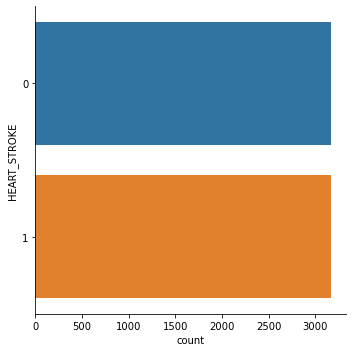

In [29]:
sb.catplot(y = "HEART_STROKE", data = heart_dis_cln_ohe_up, kind = "count")

In [30]:
heart_dis_cln_ohe_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6330 entries, 0 to 1698
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CIGS_PER_DAY              6330 non-null   float32
 1   TOT_CHOLESTEROL           6330 non-null   float32
 2   SYSTOLIC_BP               6330 non-null   float32
 3   DIASTOLIC_BP              6330 non-null   float32
 4   BMI                       6330 non-null   float32
 5   HEART_RATE                6330 non-null   float32
 6   GLUCOSE_LEVEL             6330 non-null   float32
 7   AGEGROUP_30-39            6330 non-null   float64
 8   AGEGROUP_40-49            6330 non-null   float64
 9   AGEGROUP_50-59            6330 non-null   float64
 10  AGEGROUP_60-69            6330 non-null   float64
 11  AGEGROUP_70-79            6330 non-null   float64
 12  GENDER_Female             6330 non-null   float64
 13  GENDER_Male               6330 non-null   float64
 14  EDUCATIO

Export the upsampled (plus encoded) dataset so that we can use it later.

In [31]:
heart_dis_cln_ohe_up.to_csv('heart_dis_cln_ohe_up.csv', index=False)

## DecisionTreeClassifier (upsampled data)

We then perform ```DecisionTreeClassifier``` again with the same steps, but now we have a balanced data set. 

[Text(0.5, 0.9, 'SYSTOLIC_BP <= 137.25\ngini = 0.5\nsamples = 5064\nvalue = [2530, 2534]\nclass = 1'),
 Text(0.25, 0.7, 'AGEGROUP_30-39 <= 0.5\ngini = 0.486\nsamples = 3218\nvalue = [1879, 1339]\nclass = 0'),
 Text(0.125, 0.5, 'AGEGROUP_40-49 <= 0.5\ngini = 0.496\nsamples = 2794\nvalue = [1523, 1271]\nclass = 0'),
 Text(0.0625, 0.3, 'GENDER_Male <= 0.5\ngini = 0.494\nsamples = 1400\nvalue = [626, 774]\nclass = 1'),
 Text(0.03125, 0.1, 'gini = 0.499\nsamples = 635\nvalue = [331, 304]\nclass = 0'),
 Text(0.09375, 0.1, 'gini = 0.474\nsamples = 765\nvalue = [295, 470]\nclass = 1'),
 Text(0.1875, 0.3, 'CIGS_PER_DAY <= 9.5\ngini = 0.459\nsamples = 1394\nvalue = [897, 497]\nclass = 0'),
 Text(0.15625, 0.1, 'gini = 0.406\nsamples = 713\nvalue = [511, 202]\nclass = 0'),
 Text(0.21875, 0.1, 'gini = 0.491\nsamples = 681\nvalue = [386, 295]\nclass = 0'),
 Text(0.375, 0.5, 'SYSTOLIC_BP <= 118.75\ngini = 0.269\nsamples = 424\nvalue = [356, 68]\nclass = 0'),
 Text(0.3125, 0.3, 'GENDER_Female <= 0.5\n

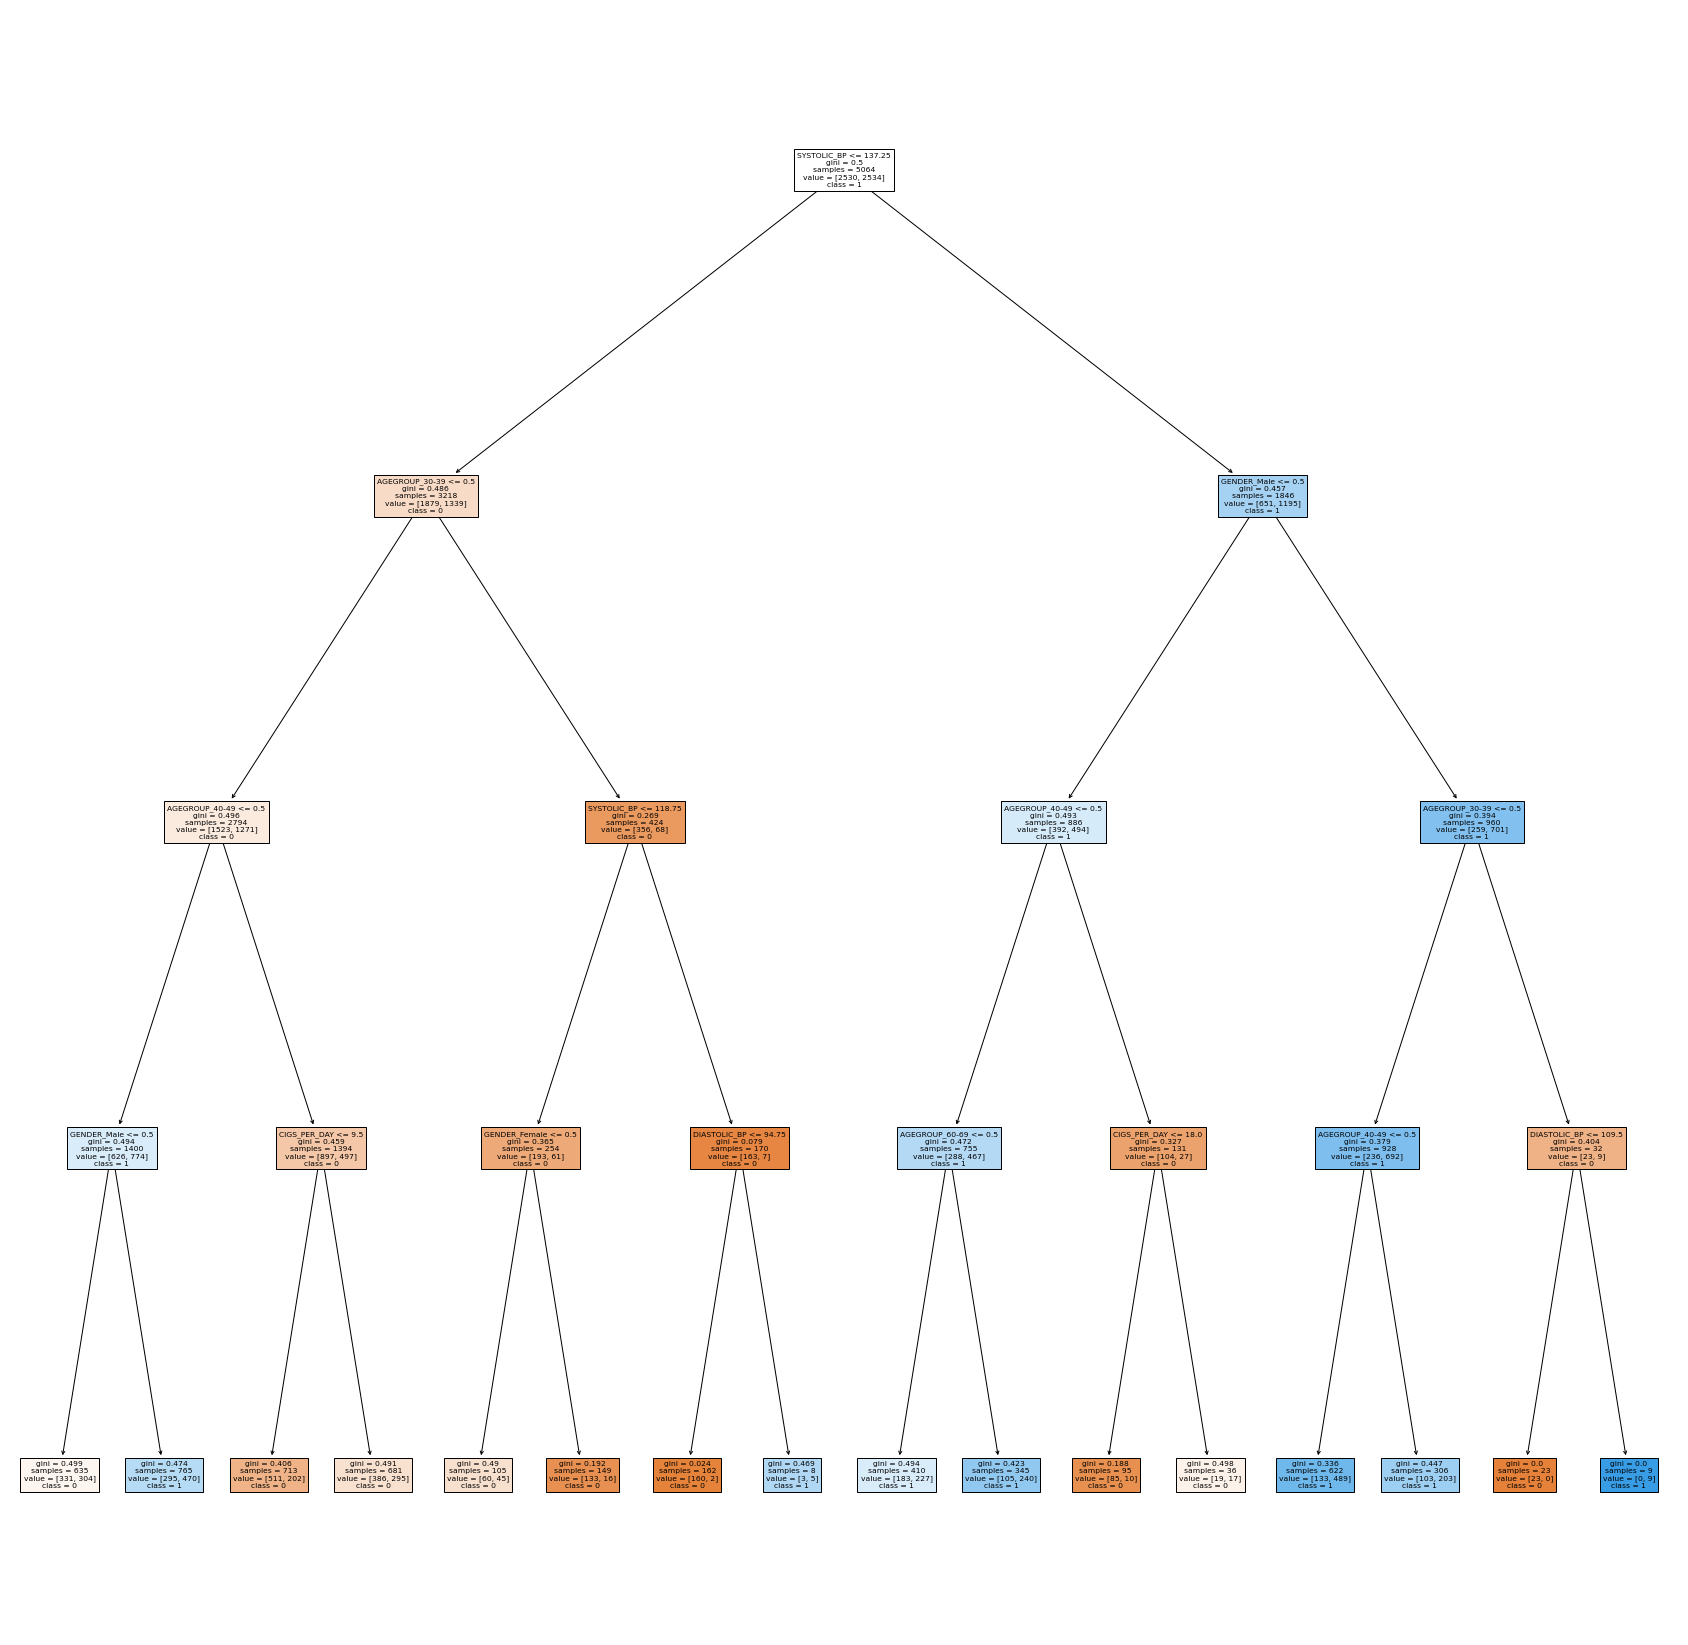

In [32]:
y = pd.DataFrame(heart_dis_cln_ohe_up["HEART_STROKE"])
X = pd.DataFrame(heart_dis_cln_ohe_up.drop("HEART_STROKE", axis = 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) #split the data into train:test=8:2

dectree=DecisionTreeClassifier(max_depth=4)
dectree.fit(X_train, y_train)

f=plt.figure(figsize=(30,30))
plot_tree(dectree, filled=True, feature_names=X_train.columns, class_names=["0", "1"])

<AxesSubplot:>

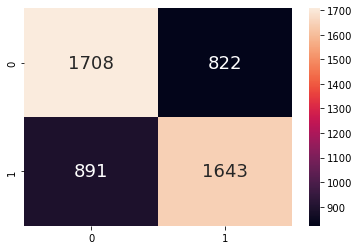

In [33]:
y_train_pred = dectree.predict(X_train)

sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [34]:
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

cmTrain = confusion_matrix(y_train, y_train_pred)
TN = cmTrain[0][0]
TP = cmTrain[1][1]

FP = cmTrain[0][1]
FN = cmTrain[1][0]


print("TN rate Train :\t", (TN/(TN + FP)))
print("FN rate Train :\t", (FN/(FN + TP)))
print()

print("TP rate Train :\t", (TP/(TP + FN)))
print("FP rate Train :\t", (FP/(FP + TN)))
print()

Train Data
Accuracy  :	 0.6617298578199052

TN rate Train :	 0.675098814229249
FN rate Train :	 0.3516179952644041

TP rate Train :	 0.6483820047355959
FP rate Train :	 0.324901185770751



<AxesSubplot:>

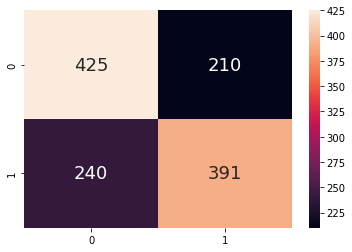

In [35]:
y_test_pred = dectree.predict(X_test)

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [36]:
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

cmTest = confusion_matrix(y_test, y_test_pred)
TN = cmTest[0][0]
TP = cmTest[1][1]

FP = cmTest[0][1]
FN = cmTest[1][0]


print("TN rate Test :\t", (TN/(TN + FP)))
print("FN rate Test :\t", (FN/(FN + TP)))
print()

print("TP rate Test :\t", (TP/(TP + FN)))
print("FP rate Test :\t", (FP/(FP + TN)))
print()

Test Data
Accuracy  :	 0.6445497630331753

TN rate Test :	 0.6692913385826772
FN rate Test :	 0.3803486529318542

TP rate Test :	 0.6196513470681458
FP rate Test :	 0.33070866141732286



Although the accuracy is lower than the initial data value, we now have an accuracy result which is not biased towards a specific category due to the imbalance of the number of data. We will now explore other ways to increase the rather low accuracy figure.

## Cross-validation (GridSearchCV) on DecisionTreeClassifier

The model performs exhaustive search over specified parameter values for an estimator. Important members are fit, predict.


More details can be found at this link: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

---

What is **cross-validation**?\
Cross-validation is a statistical method used to estimate the performance (or accuracy) of machine learning models. It is used to protect against overfitting in a predictive model, particularly in a case where the amount of data may be limited. In cross-validation, you make a fixed number of folds (or partitions) of the data, run the analysis on each fold, and then average the overall error estimate.\
More details at: https://www.mygreatlearning.com/blog/cross-validation/

In [37]:
y = pd.DataFrame(heart_dis_cln_ohe_up["HEART_STROKE"])
X = pd.DataFrame(heart_dis_cln_ohe_up.drop("HEART_STROKE", axis = 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) #split the data into train:test=8:2

We build a ```GridSearchCV``` model, with ```DecisionTreeClassifier``` as our parameter. Other parameters include max_depth of 2 to 10, cv equals to 10-fold and accuracy as the strategy to evaluate the performance.

In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': np.arange(2, 10)}             

svrGrid = GridSearchCV(DecisionTreeClassifier(),   
                      param_grid,                 
                      cv = 10,                     
                      scoring = 'accuracy')       

svrGrid.fit(X_train, y_train.HEART_STROKE.ravel())

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='accuracy')

We can then obtain the choice and the score for the best model.

In [39]:
print(svrGrid.best_estimator_)

print(np.abs(svrGrid.best_score_))

DecisionTreeClassifier(max_depth=9)
0.7681689547910284


If we increase the cv and param_grid to cross-validate, we can actually obtain a result which yields greater accuracy. However, running the function with larger parameters will be very time-consuming, and we want to avoid overfitting the data. Therefore, we will choose the parameters as shown above.

## DecisionTreeClassifier (using the best model from GridSearchCV)

We now use the optimal parameters we get from cross-validation to perform ```DecisionTreeClassifier``` again with the same steps

[Text(0.6478704637096774, 0.95, 'SYSTOLIC_BP <= 137.25\ngini = 0.5\nsamples = 5064\nvalue = [2512, 2552]\nclass = 1'),
 Text(0.44770665322580644, 0.85, 'AGEGROUP_30-39 <= 0.5\ngini = 0.487\nsamples = 3205\nvalue = [1858, 1347]\nclass = 0'),
 Text(0.29662298387096775, 0.75, 'AGEGROUP_40-49 <= 0.5\ngini = 0.497\nsamples = 2779\nvalue = [1504, 1275]\nclass = 0'),
 Text(0.16733870967741934, 0.65, 'GENDER_Female <= 0.5\ngini = 0.496\nsamples = 1413\nvalue = [641, 772]\nclass = 1'),
 Text(0.07308467741935484, 0.55, 'SYSTOLIC_BP <= 113.25\ngini = 0.477\nsamples = 765\nvalue = [301, 464]\nclass = 1'),
 Text(0.03528225806451613, 0.45, 'CIGS_PER_DAY <= 27.5\ngini = 0.486\nsamples = 127\nvalue = [74, 53]\nclass = 0'),
 Text(0.02217741935483871, 0.35, 'DIASTOLIC_BP <= 64.5\ngini = 0.395\nsamples = 96\nvalue = [70, 26]\nclass = 0'),
 Text(0.012096774193548387, 0.25, 'TOT_CHOLESTEROL <= 220.5\ngini = 0.366\nsamples = 29\nvalue = [7, 22]\nclass = 1'),
 Text(0.008064516129032258, 0.15, 'GLUCOSE_LEVEL 

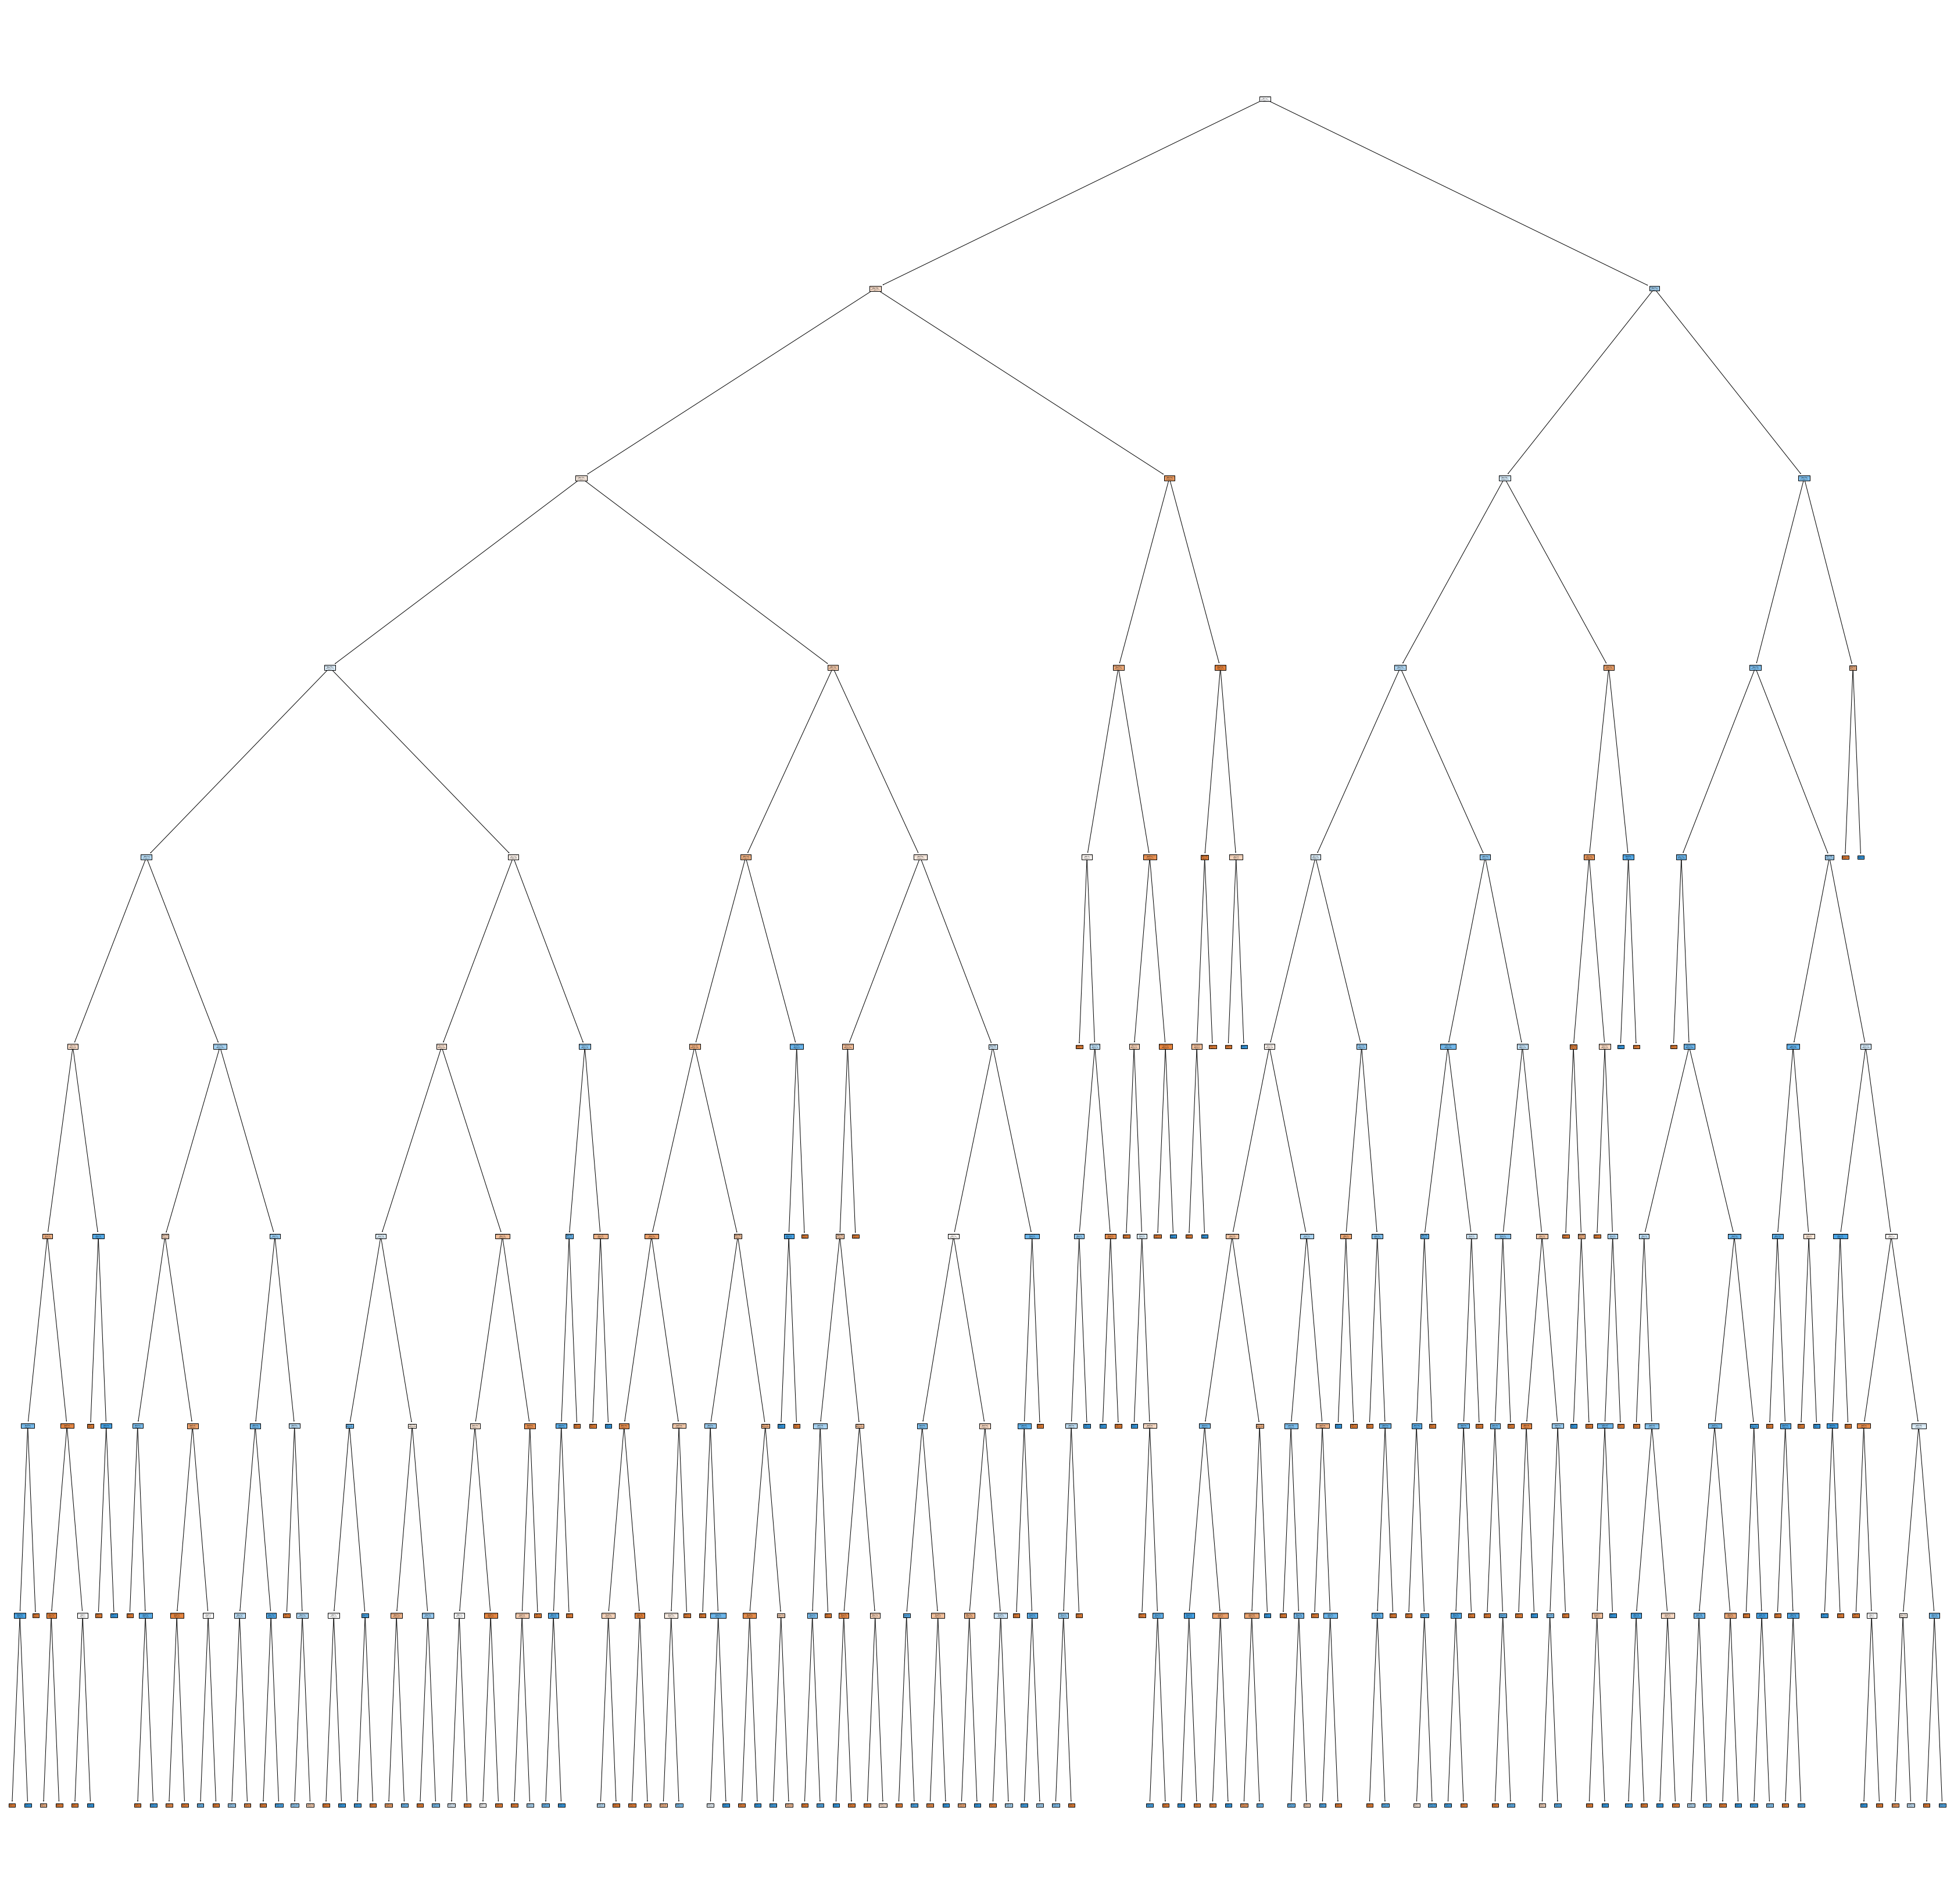

In [40]:
y = pd.DataFrame(heart_dis_cln_ohe_up["HEART_STROKE"])
X = pd.DataFrame(heart_dis_cln_ohe_up.drop("HEART_STROKE", axis = 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) #split the data into train:test=8:2

dectree=DecisionTreeClassifier(max_depth=9)
dectree.fit(X_train, y_train)

f=plt.figure(figsize=(60,60))
plot_tree(dectree, filled=True, feature_names=X_train.columns, class_names=["0", "1"])

<AxesSubplot:>

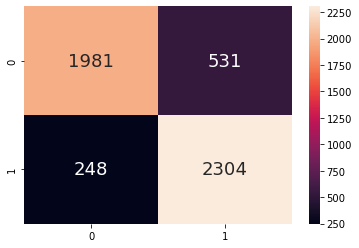

In [41]:
y_train_pred = dectree.predict(X_train)

sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [42]:
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

cmTrain = confusion_matrix(y_train, y_train_pred)
TN = cmTrain[0][0]
TP = cmTrain[1][1]

FP = cmTrain[0][1]
FN = cmTrain[1][0]


print("TN rate Train :\t", (TN/(TN + FP)))
print("FN rate Train :\t", (FN/(FN + TP)))
print()

print("TP rate Train :\t", (TP/(TP + FN)))
print("FP rate Train :\t", (FP/(FP + TN)))
print()

Train Data
Accuracy  :	 0.8461690363349131

TN rate Train :	 0.7886146496815286
FN rate Train :	 0.09717868338557993

TP rate Train :	 0.9028213166144201
FP rate Train :	 0.21138535031847133



<AxesSubplot:>

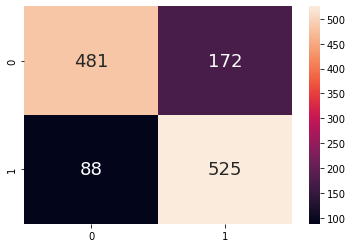

In [43]:
y_test_pred = dectree.predict(X_test)

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [44]:
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

cmTest = confusion_matrix(y_test, y_test_pred)
TN = cmTest[0][0]
TP = cmTest[1][1]

FP = cmTest[0][1]
FN = cmTest[1][0]


print("TN rate Test :\t", (TN/(TN + FP)))
print("FN rate Test :\t", (FN/(FN + TP)))
print()

print("TP rate Test :\t", (TP/(TP + FN)))
print("FP rate Test :\t", (FP/(FP + TN)))
print()

Test Data
Accuracy  :	 0.7946287519747235

TN rate Test :	 0.7366003062787136
FN rate Test :	 0.14355628058727568

TP rate Test :	 0.8564437194127243
FP rate Test :	 0.26339969372128635



By using the parameters we got from cross-validation, we can now build our model which is of higher accuracy, for both our train and test data

## RandomForestClassifier (upsampled data)

We have done ```DecisionTreeClassifier``` above. Now let us use ```RandomForestClassifier``` to build a better model. Since, we have realised that it is important to upsample our data to balanced the data sets, let us immmediately utilise the upsampled data to use the RandomForestClassifier. A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
More details at: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Similarly, we are going to use all the predictors we have to predict the occurrence of `HEART_STROKE`.

Import the essential libraries.

> RandomForestClassifier: A random forest classifier.

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
y = pd.DataFrame(heart_dis_cln_ohe_up["HEART_STROKE"])
X = pd.DataFrame(heart_dis_cln_ohe_up.drop("HEART_STROKE", axis = 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) #split the data into train:test=8:2

Create a ```RandomForestClassifier``` object with the following parameters:
- n_estimators: 100
- max_depth: 4
- Leaving other parameters as default

Fit the model using the **train** data.

In [47]:
rfc = RandomForestClassifier(n_estimators = 100, max_depth = 4)       

rfc.fit(X_train, y_train.HEART_STROKE.ravel())

RandomForestClassifier(max_depth=4)

We will now predict the **train** data using the model we trained just now and plot the **heatmap of confusion matrix**.

| Confusion Matrix  |       |        |     
| :---              | :---: | :----: |        
| Actual 0  |  TN  |  FP |            
| Actual 1  |  FN |  TP  |    
|                   | Predicted 0| Predicted 1|

In [48]:
y_train_pred = rfc.predict(X_train)

print("Train Data")
print("Accuracy  :\t", rfc.score(X_train, y_train))
print()

cmTrain = confusion_matrix(y_train, y_train_pred)
TN = cmTrain[0][0]
TP = cmTrain[1][1]

FP = cmTrain[0][1]
FN = cmTrain[1][0]


print("TN rate Train :\t", (TN/(TN + FP)))
print("FN rate Train :\t", (FN/(FN + TP)))
print()

print("TP rate Train :\t", (TP/(TP + FN)))
print("FP rate Train :\t", (FP/(FP + TN)))
print()

Train Data
Accuracy  :	 0.6960900473933649

TN rate Train :	 0.6889064350572444
FN rate Train :	 0.29672066376926115

TP rate Train :	 0.7032793362307388
FP rate Train :	 0.31109356494275564



<AxesSubplot:>

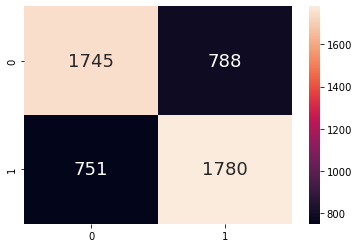

In [49]:
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

We will now predict the **test** data using the model we trained just now and plot the **heatmap of confusion matrix**.

| Confusion Matrix  |       |        |     
| :---              | :---: | :----: |        
| Actual 0  |  TN  |  FP |            
| Actual 1  |  FN |  TP  |    
|                   | Predicted 0| Predicted 1|

Test Data
Accuracy  :	 0.839652448657188

TN rate Test :	 0.6613924050632911
FN rate Test :	 0.3580441640378549

TP rate Test :	 0.6419558359621451
FP rate Test :	 0.33860759493670883



<AxesSubplot:>

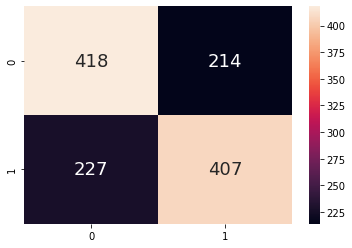

In [50]:
y_test_pred = rfc.predict(X_test)
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

cmTest = confusion_matrix(y_test, y_test_pred)
TN = cmTest[0][0]
TP = cmTest[1][1]

FP = cmTest[0][1]
FN = cmTest[1][0]


print("TN rate Test :\t", (TN/(TN + FP)))
print("FN rate Test :\t", (FN/(FN + TP)))
print()

print("TP rate Test :\t", (TP/(TP + FN)))
print("FP rate Test :\t", (FP/(FP + TN)))
print()

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Compared to the cross-validated `DecisionTreeClassifier`, the accuracy of this is quite a fair bit lower. However, this accuracy is higher than the that of the `Decision Tree Classifier` before performing Cross-Validation. 


The accuracy across each category is more balanced in `RandomForestClassifier` model. (E.g. for test data `DecisionTreeClassifier`, the test accuracy for the `DecisionTreeClassifier` for the TN rate is about 0.67 while the accuracy for the TP rate is about 0.62. Whereas in the test data of the `RandomForestClassifier` model, the TN rate is 0.66, and the TP rate is close at 0.64.)


`RandomForestClassifier` is preferred due to it not overfitting as well as error due to biasness as compared to a `DecisionTreeClassifier`. In terms of general accuracy, we can increase it subsequently using Cross-Validation as we have previously with the `DecisionTreeClassifier`

## Cross-validation (GridSearchCV) on RandomForestClassifier

Similarly, we will now perform cross-validation using ```GridSearchCV``` for ```RandomForestClassifier``` to determine the best parameters to be used.

In [51]:
y = pd.DataFrame(heart_dis_cln_ohe_up["HEART_STROKE"])
X = pd.DataFrame(heart_dis_cln_ohe_up.drop("HEART_STROKE", axis = 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) #split the data into train:test=8:2

We build a ```GridSearchCV``` model, with ```RandomForestClassifier``` as our parameter. Other parameters include n_estimators of 100 to 500, max_depth of 4 to 10, cv equals to 5-fold and accuracy as the strategy to evaluate the performance. Note that we can actually increase the range to perform our cross-validation. However, this will require significantly more time for the running of the code.

In [52]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': np.arange(100,501,100), 'max_depth': np.arange(4, 10)}             

svrGrid = GridSearchCV(RandomForestClassifier(),   
                      param_grid,                 
                      cv = 5,                     
                      scoring = 'accuracy')       

svrGrid.fit(X_train, y_train.HEART_STROKE.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([4, 5, 6, 7, 8, 9]),
                         'n_estimators': array([100, 200, 300, 400, 500])},
             scoring='accuracy')

We can then obtain the choice and the score for the best model.

In [53]:
print(svrGrid.best_estimator_)

print(np.abs(svrGrid.best_score_))

RandomForestClassifier(max_depth=9, n_estimators=400)
0.840441649856217


Similar to the case above, if we increase the cv and param_grid to cross-validate, we can actually obtain a result which yield greater accuracy. However, running with larger parameters will be very time-consuming. Therefore, we will choose the parameters as shown above.

## RandomForestClassifier (best model from GridSearchCV)

We now use the optimal parameters we obtained from cross-validation to perform RandomForestClassifier again. The steps are exactly the same as what we did just now.

In [54]:
y = pd.DataFrame(heart_dis_cln_ohe_up["HEART_STROKE"])
X = pd.DataFrame(heart_dis_cln_ohe_up.drop("HEART_STROKE", axis = 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

rfc = RandomForestClassifier(n_estimators = 400, max_depth = 9)       
rfc.fit(X_train, y_train.HEART_STROKE.ravel())

RandomForestClassifier(max_depth=9, n_estimators=400)

Train Data
Accuracy  :	 0.8943522906793049

TN rate Train :	 0.8876538308852719
FN rate Train :	 0.09901768172888016

TP rate Train :	 0.9009823182711199
FP rate Train :	 0.11234616911472807



<AxesSubplot:>

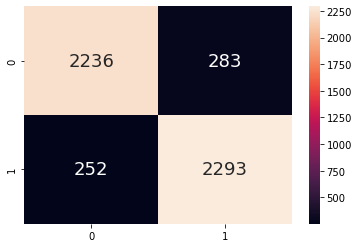

In [55]:
y_train_pred = rfc.predict(X_train)

print("Train Data")
print("Accuracy  :\t", rfc.score(X_train, y_train))
print()

cmTrain = confusion_matrix(y_train, y_train_pred)
TN = cmTrain[0][0]
TP = cmTrain[1][1]

FP = cmTrain[0][1]
FN = cmTrain[1][0]


print("TN rate Train :\t", (TN/(TN + FP)))
print("FN rate Train :\t", (FN/(FN + TP)))
print()

print("TP rate Train :\t", (TP/(TP + FN)))
print("FP rate Train :\t", (FP/(FP + TN)))
print()

sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.8364928909952607

TN rate Test :	 0.8157894736842105
FN rate Test :	 0.14516129032258066

TP rate Test :	 0.8548387096774194
FP rate Test :	 0.18421052631578946



<AxesSubplot:>

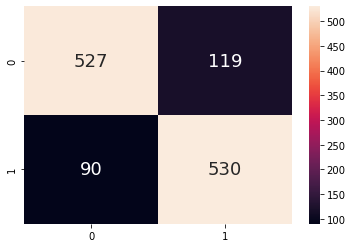

In [56]:
y_test_pred = rfc.predict(X_test)

print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

cmTest = confusion_matrix(y_test, y_test_pred)
TN = cmTest[0][0]
TP = cmTest[1][1]

FP = cmTest[0][1]
FN = cmTest[1][0]


print("TN rate Test :\t", (TN/(TN + FP)))
print("FN rate Test :\t", (FN/(FN + TP)))
print()

print("TP rate Test :\t", (TP/(TP + FN)))
print("FP rate Test :\t", (FP/(FP + TN)))
print()

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})


As you can see, by using the parameters we got from cross-validation, a model of much higher accuracy can be built now. This applies to both the train and the test data sets. As before, the rate test across the categories are much more consistent in the `RandomForestClassifier` after Cross-Validation than the `DecisionTreeClassifier` after Cross-Validation.(E.g. the TN rate for the `RandomForestClassifier` after Cross Validation is about 0.74 and TP rate is around 0.86 - where as for `RandomForestClassifier` after Cross-Validation: TN rate is around 0.82 and the TP rate is only slightly away around 0.85.)

Despite the FP rate of this model being lower than that of the `RandomForestClassifier` after Cross-validation, this model is still preferred due to it not overfitting.

The general accuracy here is also higher than that of the `DecisionTreeClassifier` after Cross-Validation, making it a better model.